In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import pandas as pd

df_first_date = pd.read_csv('/home/hidrologia/Pronostico_hidro/Inputs/wrf_discharge.csv')

def create_lagged_features(df, number_of_lags):
    """
    Creates lagged features in the dataframe based on the specified number of lags.
    
    :param df: Pandas DataFrame containing the 'discharge' column.
    :param number_of_lags: Number of lagged discharge values to include.
    :return: DataFrame with lagged features.
    """
    for lag in range(1, number_of_lags + 1):
        df[f'lagged_discharge_{lag}'] = df['Discharge'].shift(lag)
    return df.dropna()  # Drop rows with NaN values resulting from the shift operation

# Example usage
number_of_lags = 3  # You can change this value to the number of lagged days you want
df_first_date = create_lagged_features(df_first_date, number_of_lags)

# Preparing the DataFrame for modeling
X = df_first_date.drop(['Discharge', 'date'], axis=1)
y = df_first_date['Discharge']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the model
joblib.dump(rf_model, 'rf_model_day1.pkl')

# Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1552.3280869589212
R-squared: 0.856111831340415


In [17]:
X.head()


,Unnamed: 0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_1674,pixel_1675,pixel_1676,pixel_1677,pixel_1678,pixel_1679,pixel_1680,lagged_discharge_1,lagged_discharge_2,lagged_discharge_3
54,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,83.731597,79.748210,93.593631
55,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,114.022331,83.731597,79.748210
56,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,91.931630,114.022331,83.731597
57,57,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,68.875011,91.931630,114.022331
58,58,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,71.386610,68.875011,91.931630


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import pandas as pd
import numpy as np

# Assuming df_first_date is your DataFrame after loading and creating lagged features
df_first_date = pd.read_csv('/home/hidrologia/Pronostico_hidro/Inputs/wrf_discharge.csv')

def create_lagged_features(df, number_of_lags):
    for lag in range(1, number_of_lags + 1):
        df[f'lagged_discharge_{lag}'] = df['Discharge'].shift(lag)
    return df.dropna()

number_of_lags = 3
df_first_date = create_lagged_features(df_first_date, number_of_lags)

X = df_first_date.drop(['Discharge', 'date'], axis=1)
y = df_first_date['Discharge']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# MSE and R2 for Training Data
y_train_pred = rf_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# MSE and R2 for Testing Data
y_test_pred = rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Output MSE and R2
print("Training MSE:", mse_train)
print("Training R-squared:", r2_train)
print("Testing MSE:", mse_test)
print("Testing R-squared:", r2_test)

# Function for NSE
def calculate_nse(observed, simulated):
    return 1 - sum((observed - simulated) ** 2) / sum((observed - np.mean(observed)) ** 2)

# Function for KGE
def calculate_kge(observed, simulated):
    r = np.corrcoef(observed, simulated)[0, 1]
    alpha = np.std(simulated) / np.std(observed)
    beta = np.mean(simulated) / np.mean(observed)
    return 1 - np.sqrt((r - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)

# Calculate NSE and KGE for Training and Testing Data
nse_train = calculate_nse(y_train, y_train_pred)
kge_train = calculate_kge(y_train, y_train_pred)
nse_test = calculate_nse(y_test, y_test_pred)
kge_test = calculate_kge(y_test, y_test_pred)

# Output NSE and KGE
print(f"Training NSE: {nse_train}, KGE: {kge_train}")
print(f"Testing NSE: {nse_test}, KGE: {kge_test}")


Training MSE: 264.26078077907977
Training R-squared: 0.9741546305757144
Testing MSE: 1552.3280869589212
Testing R-squared: 0.856111831340415
Training NSE: 0.9741546305757144, KGE: 0.9451456713193085
Testing NSE: 0.8561118313404151, KGE: 0.8549010952549074


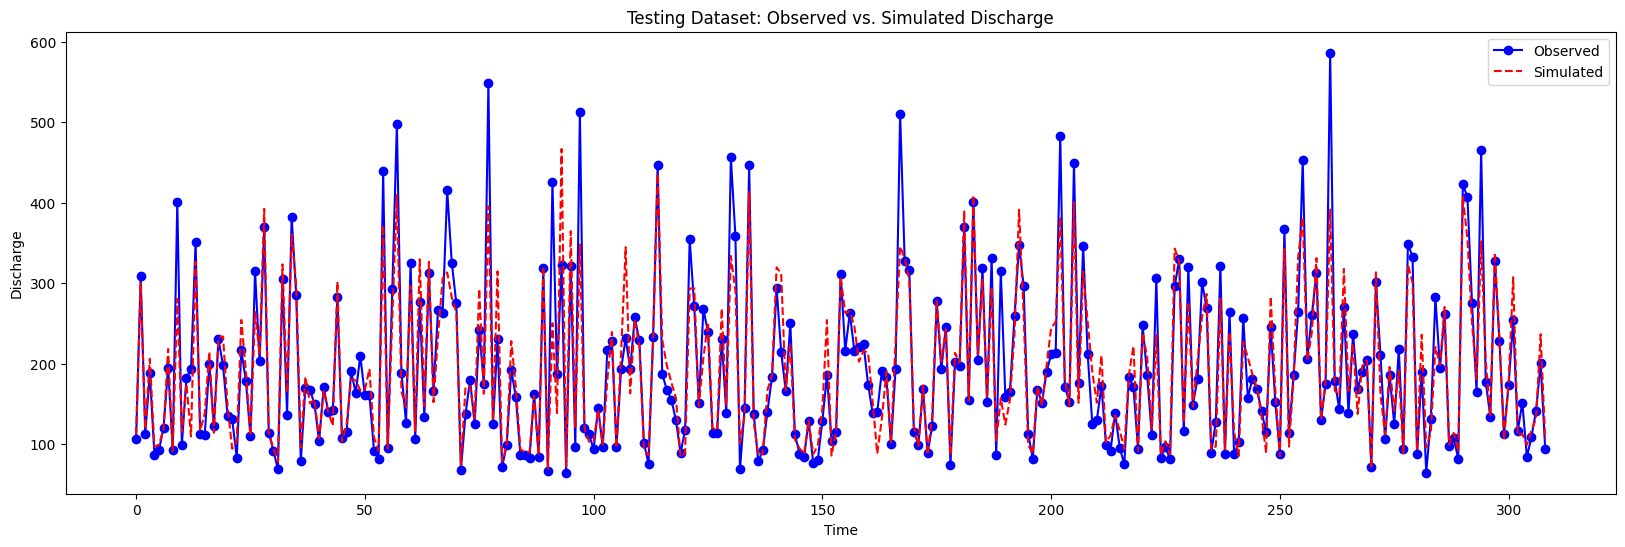

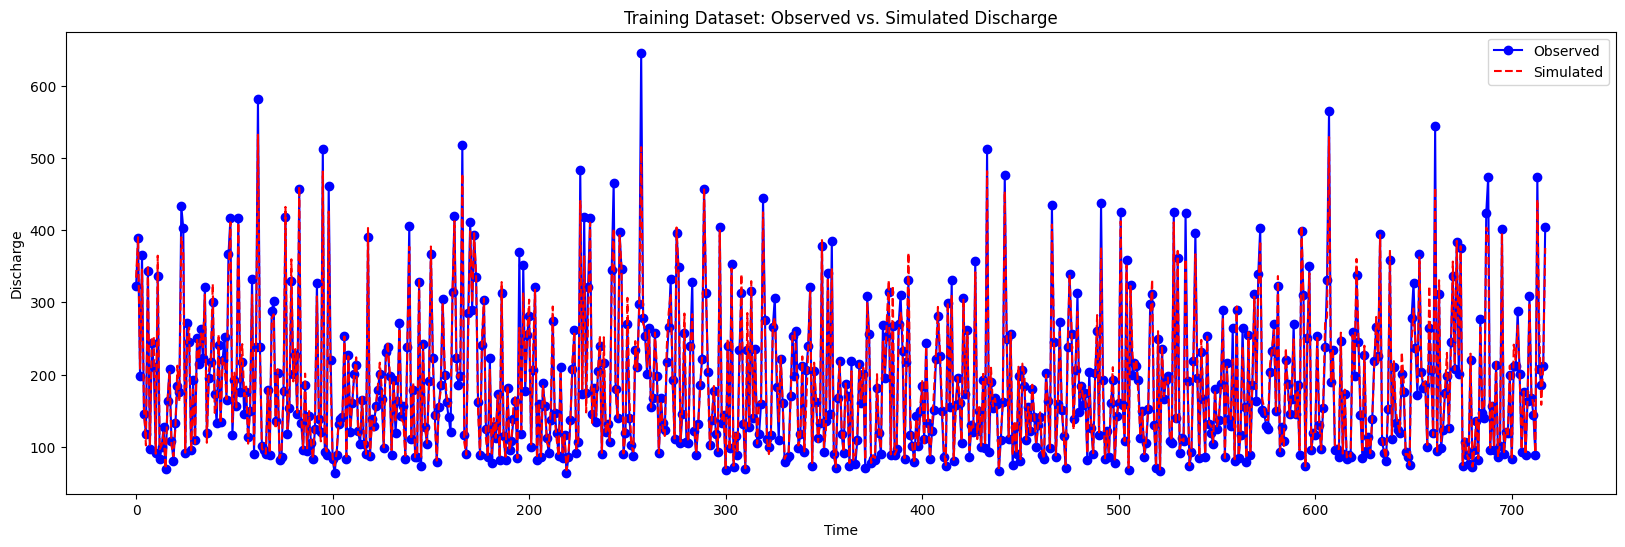

In [25]:
# First Plot: Observed vs. Simulated Data (Testing)
plt.figure(figsize=(20, 6))  # Adjust the size as needed
plt.plot(y_test.reset_index(drop=True), label='Observed', color='blue', marker='o')
plt.plot(y_test_pred, label='Simulated', color='red', linestyle='--')
plt.title('Testing Dataset: Observed vs. Simulated Discharge')
plt.xlabel('Time')
plt.ylabel('Discharge')
plt.legend()
plt.show()

# Second Plot: Observed vs. Simulated Data (Training)
plt.figure(figsize=(20, 6))  # Adjust the size as needed
plt.plot(y_train.reset_index(drop=True), label='Observed', color='blue', marker='o')
plt.plot(y_train_pred, label='Simulated', color='red', linestyle='--')
plt.title('Training Dataset: Observed vs. Simulated Discharge')
plt.xlabel('Time')
plt.ylabel('Discharge')
plt.legend()
plt.show()

# PRUEBA 09 de Febrero de 2024

In [1]:
import pandas as pd

# Paths to your CSV files
rainfall_csv_path = '/home/hidrologia/Pronostico_hidro/Inputs/first_date_data.csv'  # Path to the rainfall data CSV
discharge_csv_path = '/home/hidrologia/Pronostico_hidro/Inputs/timeseries_daily.csv'  # Path to the discharge data CSV

# Load the rainfall data
df_rainfall = pd.read_csv(rainfall_csv_path)
# Ensure the 'date' column in df_rainfall is of type datetime64[ns] without time
df_rainfall['date'] = pd.to_datetime(df_rainfall['date']).dt.date

# Load the discharge data
df_discharge = pd.read_csv(discharge_csv_path)
# Convert 'DateTime' to datetime64[ns] and then to date to match the rainfall data format
df_discharge['DateTime'] = pd.to_datetime(df_discharge['DateTime']).dt.date

# Rename 'DateTime' column to 'date' to enable merging
df_discharge.rename(columns={'DateTime': 'date'}, inplace=True)

# Merge the datasets on the date column
merged_df = pd.merge(df_rainfall, df_discharge, on='date', how='inner')

# Save the merged dataset to a new CSV file
merged_csv_path = 'merged_rainfall_discharge.csv'
merged_df.to_csv(merged_csv_path, index=False)

print(f"Merged dataset saved to {merged_csv_path}")



Merged dataset saved to merged_rainfall_discharge.csv


In [8]:
merged_df


,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_1672,pixel_1673,pixel_1674,pixel_1675,pixel_1676,pixel_1677,pixel_1678,pixel_1679,pixel_1680,Discharge
count,1110.0,1110.0,1110.0,1110.0,1110.0,1110.0,1110.0,1110.0,1110.0,1110.0,...,1110.0,1110.0,1110.0,1110.0,1110.0,1110.0,1110.0,1110.0,1110.0,1042.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.926324
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.255304
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.178559
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.701626
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164.602669
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.518208
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645.617282


# COMPLETE SCRIPT

Training NSE: 0.9747324211576633, MSE: 260.52275417701225, KGE: 0.9576024726492239
Testing NSE: 0.8948930596453277, MSE: 1055.667782055294, KGE: 0.9353649330031051


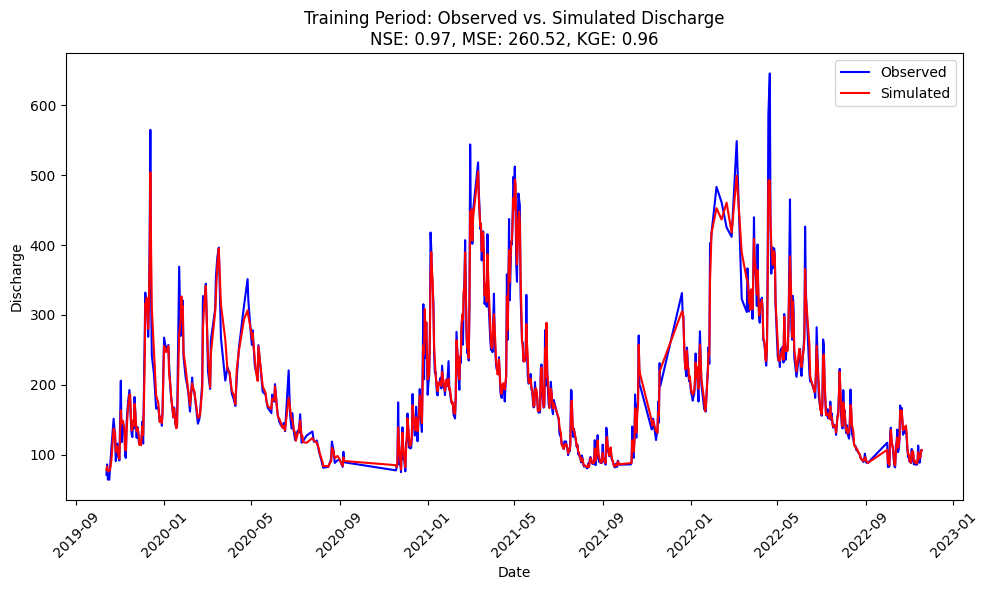

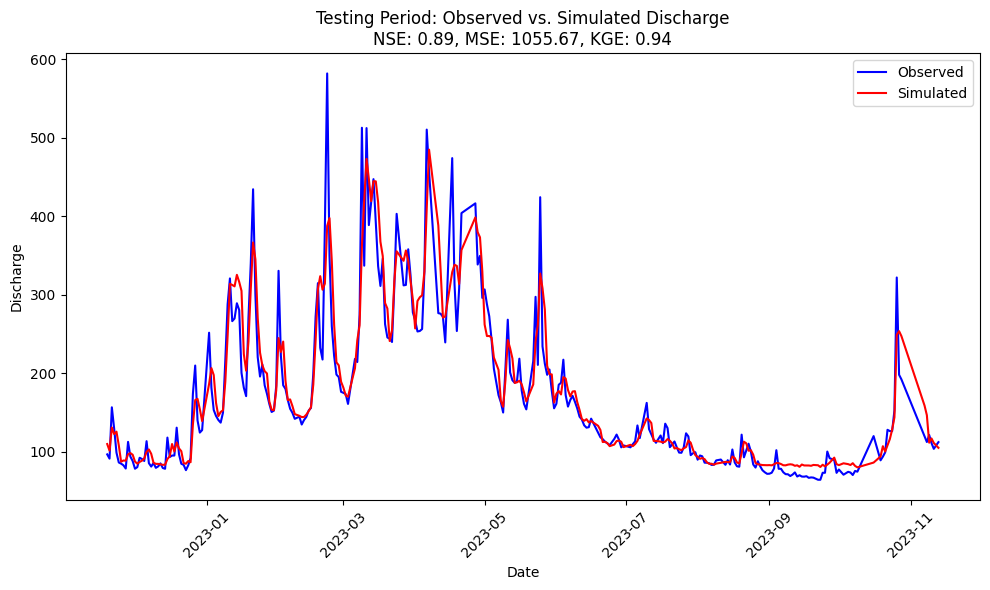

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# Function to calculate Nash-Sutcliffe Efficiency
def nse(observed, simulated):
    return 1 - sum((simulated-observed)**2)/sum((observed-np.mean(observed))**2)

# Function to calculate Kling-Gupta Efficiency
def kge(observed, simulated):
    r = np.corrcoef(observed, simulated)[0, 1]
    alpha = np.std(simulated) / np.std(observed)
    beta = np.sum(simulated) / np.sum(observed)
    return 1 - np.sqrt((r-1)**2 + (alpha-1)**2 + (beta-1)**2)

def create_lagged_features(df, column_name, max_lag):
    for lag in range(1, max_lag + 1):
        df[f'{column_name}_lag_{lag}'] = df[column_name].shift(lag)
    return df

#roling average
merged_df['Discharge_rolling_avg'] = merged_df['Discharge'].rolling(window=3, min_periods=1).mean()
# Choose a lag value
max_lag = 3  # For example, you can use a lag of 3 time steps

# Create lagged features for the 'Discharge' column
merged_df = create_lagged_features(merged_df, 'Discharge', max_lag)

# Drop rows with NaN values that were created by shifting to create lagged features
merged_df = merged_df.dropna()

# Preparing data
X = merged_df.drop(columns=['date', 'Discharge'])
y = merged_df['Discharge']
dates = merged_df['date']

# Splitting data (70% training, 30% testing) sequentially
split_index = int(len(X) * 0.7)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
dates_train, dates_test = dates[:split_index], dates[split_index:]

# Training the Random Forest model
model = RandomForestRegressor(
    n_estimators=150,  # Increased from 100 for potentially better performance
    max_depth=20,  # Adjust as needed based on the complexity of your data
    min_samples_split=10,  # Helps to prevent overfitting on minor details
    min_samples_leaf=5,  # Ensures that leaves have a minimum number of samples
    #max_features='sqrt',  # Auto setting for regression typically uses all features, consider "sqrt" or "log2" for high-dimensional data
    bootstrap=True,  # Keep bootstrap sampling to True for general usage
    n_jobs = -2
)
model.fit(X_train, y_train)

# Predicting discharge
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating metrics
nse_train = nse(y_train, y_train_pred)
nse_test = nse(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
kge_train = kge(y_train, y_train_pred)
kge_test = kge(y_test, y_test_pred)

# Outputting the metrics
print(f"Training NSE: {nse_train}, MSE: {mse_train}, KGE: {kge_train}")
print(f"Testing NSE: {nse_test}, MSE: {mse_test}, KGE: {kge_test}")

# Plotting observed vs. predicted discharge for training period
plt.figure(figsize=(10, 6))
plt.plot(dates_train, y_train, label='Observed', color='blue')
plt.plot(dates_train, y_train_pred, label='Simulated', color='red')
plt.title(f"Training Period: Observed vs. Simulated Discharge\nNSE: {nse_train:.2f}, MSE: {mse_train:.2f}, KGE: {kge_train:.2f}")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting observed vs. predicted discharge for testing period
plt.figure(figsize=(10, 6))
plt.plot(dates_test, y_test, label='Observed', color='blue')
plt.plot(dates_test, y_test_pred, label='Simulated', color='red')
plt.title(f"Testing Period: Observed vs. Simulated Discharge\nNSE: {nse_test:.2f}, MSE: {mse_test:.2f}, KGE: {kge_test:.2f}")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# PARTIAL AUTOCORRELATION ANALYSIS

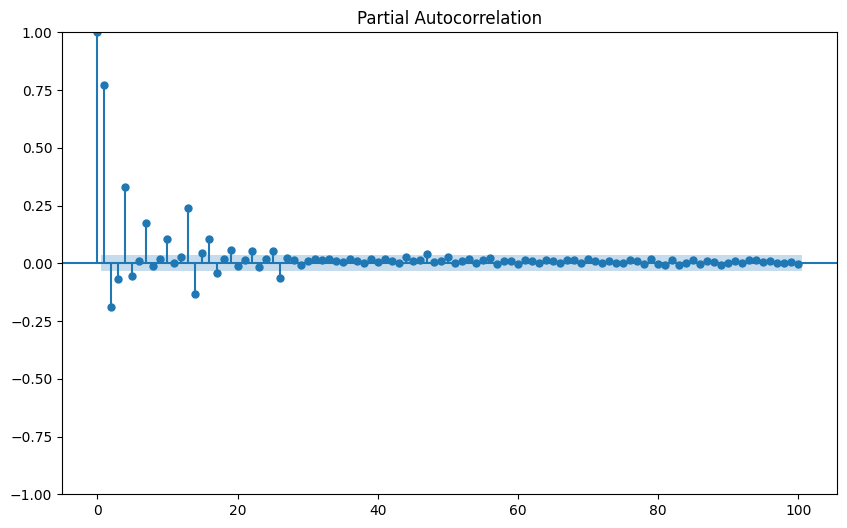

In [6]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
df_first_date = pd.read_csv('/home/hidrologia/esmeraldas/merged_2019-01-01_2024-03-26.csv')
# DROP NaNs values for this analysis
df_first_date.dropna(subset=['hidro_level_sm'], inplace=True)

# PACF plot to determine the optimal number of lags
discharge_series = df_first_date['hidro_level_sm']
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(discharge_series, ax=ax, lags=100)  # Adjust lags as needed
plt.show()

In [23]:
from statsmodels.tsa.ar_model import AutoReg

# Fit an AutoReg model

optimal_lag = 6  # Check the PACP 
model = AutoReg(discharge_series, lags=optimal_lag)
model_fitted = model.fit()

# Summary of the model
print(model_fitted.summary())

# Predictions
predictions = model_fitted.predict(start=len(discharge_series), end=len(discharge_series) + optimal_lag)
print(predictions)


                            AutoReg Model Results                             
Dep. Variable:              Discharge   No. Observations:                 1042
Model:                     AutoReg(6)   Log Likelihood               -5419.597
Method:               Conditional MLE   S.D. of innovations             45.256
Date:                Fri, 09 Feb 2024   AIC                          10855.195
Time:                        17:24:48   BIC                          10894.740
Sample:                             6   HQIC                         10870.199
                                 1042                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.3876      3.183      4.206      0.000       7.149      19.626
Discharge.L1     0.7832      0.031     25.249      0.000       0.722       0.844
Discharge.L2     0.0349      0.039      0.88

/home/hidrologia/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hidrologia/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/hidrologia/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/hidrologia/.local/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain th

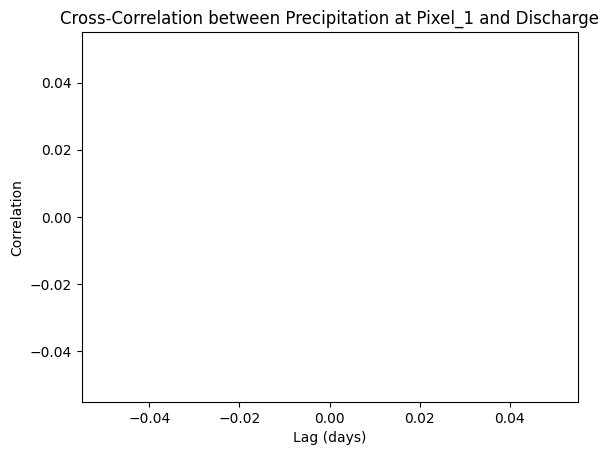

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `df` with columns 'date', 'discharge', 'pixel_1', 'pixel_2', ..., 'pixel_n'
# And each row represents a day

def compute_cross_correlation(pixel_series, discharge_series, max_lag=250):
    correlations = [np.corrcoef(pixel_series.shift(lag), discharge_series)[0, 1] for lag in range(max_lag)]
    return correlations

# Example for pixel_1
correlations_pixel_1 = compute_cross_correlation(merged_df['pixel_1'], merged_df['Discharge'], max_lag=300)

# Plotting the cross-correlation for pixel_1
plt.plot(correlations_pixel_1)
plt.title('Cross-Correlation between Precipitation at Pixel_1 and Discharge')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.show()


# CROSS-VALIDATION 5 SPLITS

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# Function to calculate Nash-Sutcliffe Efficiency
def nse(observed, simulated):
    return 1 - sum((simulated-observed)**2)/sum((observed-np.mean(observed))**2)

# Function to calculate Kling-Gupta Efficiency
def kge(observed, simulated):
    r = np.corrcoef(observed, simulated)[0, 1]
    alpha = np.std(simulated) / np.std(observed)
    beta = np.sum(simulated) / np.sum(observed)
    return 1 - np.sqrt((r-1)**2 + (alpha-1)**2 + (beta-1)**2)

# Adjusted function to create lagged features and include rolling averages
def create_lagged_and_rolling_features(df, column_name, max_lag, rolling_window):
    for lag in range(1, max_lag + 1):
        df[f'{column_name}_lag_{lag}'] = df[column_name].shift(lag)
    df[f'{column_name}_rolling_avg'] = df[column_name].rolling(window=rolling_window, min_periods=1).mean()
    return df.dropna()


max_lag = 2
rolling_window = 5
merged_df = create_lagged_and_rolling_features(merged_df, 'Discharge', max_lag, rolling_window)

# Preparing data
X = merged_df.drop(columns=['date', 'Discharge'])
y = merged_df['Discharge']
dates = merged_df['date']

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    dates_train, dates_test = dates.iloc[train_index], dates.iloc[test_index]

    # Training the Random Forest model
    model = RandomForestRegressor(n_estimators=150, max_depth=20, min_samples_split=10, min_samples_leaf=5, bootstrap=True)
    model.fit(X_train, y_train)

    # Predicting discharge
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculating metrics
    nse_train = nse(y_train, y_train_pred)
    nse_test = nse(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    kge_train = kge(y_train, y_train_pred)
    kge_test = kge(y_test, y_test_pred)

    # Outputting the metrics for each split
    print(f"Split Training NSE: {nse_train}, MSE: {mse_train}, KGE: {kge_train}")
    print(f"Split Testing NSE: {nse_test}, MSE: {mse_test}, KGE: {kge_test}")

    # Plotting could be done here for each split if needed
    # Plot commands go here




Split Training NSE: 0.9085610529820303, MSE: 604.1237742887091, KGE: 0.8819587564609408
Split Testing NSE: 0.6188878486900682, MSE: 4412.456596947708, KGE: 0.5864119822613443
Split Training NSE: 0.9548830412724643, MSE: 471.96980574346884, KGE: 0.9270356943957945
Split Testing NSE: 0.7580759882134532, MSE: 898.0213239000564, KGE: 0.8793928290277994
Split Training NSE: 0.9607158367756392, MSE: 365.68871522938616, KGE: 0.9314220594259939
Split Testing NSE: 0.852302953216842, MSE: 1874.9055182014554, KGE: 0.8602946461756307
Split Training NSE: 0.9598152662625574, MSE: 415.3812833657514, KGE: 0.9351386779070227
Split Testing NSE: 0.8260971608418486, MSE: 2093.1062663912135, KGE: 0.8792891493491697
Split Training NSE: 0.9610415226471807, MSE: 416.54547402741514, KGE: 0.9374859344435265
Split Testing NSE: 0.840802691276719, MSE: 830.5150415952057, KGE: 0.8972835914893902


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

X = merged_df.drop(columns=['date', 'Discharge'])
y = merged_df['Discharge']
dates = merged_df['date']

# Initialize TimeSeriesSplit for outer CV
outer_tscv = TimeSeriesSplit(n_splits=5)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Loop over each split in the outer CV
for train_index, test_index in outer_tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Setup inner CV for hyperparameter tuning
    inner_tscv = TimeSeriesSplit(n_splits=3)
    model = RandomForestRegressor(bootstrap=True, random_state=42)  # Ensure reproducibility
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_tscv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Retrieve the best model
    best_model = grid_search.best_estimator_
    
    # Predict and evaluate with the best model
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calculate metrics for the best model
    nse_train = nse(y_train, y_train_pred)
    nse_test = nse(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    kge_train = kge(y_train, y_train_pred)
    kge_test = kge(y_test, y_test_pred)
    
    # Outputting the metrics for each split
    print(f"Best Model Parameters: {grid_search.best_params_}")
    print(f"Split Training NSE: {nse_train}, MSE: {mse_train}, KGE: {kge_train}")
    print(f"Split Testing NSE: {nse_test}, MSE: {mse_test}, KGE: {kge_test}")


Best Model Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}
Split Training NSE: 0.8529038102856606, MSE: 971.8430516949293, KGE: 0.8395438867675961
Split Testing NSE: 0.5936515749308031, MSE: 4704.63820870873, KGE: 0.560356412647468
Best Model Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Split Training NSE: 0.9778393168746742, MSE: 231.82354495492996, KGE: 0.9362449810371332
Split Testing NSE: 0.7281400178639877, MSE: 1009.1435706209791, KGE: 0.8628319566578668
Best Model Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Split Training NSE: 0.9795835564827402, MSE: 190.05274356334618, KGE: 0.9456326345469945
Split Testing NSE: 0.8570541643951624, MSE: 1814.5923822898665, KGE: 0.8614044317002266
Best Model Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Split Training NSE: 0.97969167285688